**K-Means clustering algorithm**

Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load Data

In [0]:
df = pd.read_csv('https://gist.githubusercontent.com/prmishra/0e42b7444729751f354f668687ae0f4c/raw/072e4757d4041f789f00b0943b6ffed607342f16/data.csv')
df.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


Define class Kmeans

In [0]:
class Kmeans:
    """ K Means Clustering
    Parameters
    -----------
        k: int , number of clusters
        data_fit: Pandas DataFrame, Data to fit the algorithm on
        seed: int, will be randomly set if None
        max_iter: int, number of iterations to run algorithm, default: 200
    Attributes
    -----------
       cluster_list: list, association of data with clusters
       cluster_plt: list, Labels for data points in association with clusters(parameter for plot_cluster method)
       mean_plt: nd array, Centroids for clusters(parameter for plot_cluster method)
       idx: int, randomly selected index values of the input data frame
       values_df: pandas DataFrame, data associated to a particular cluster group
       data_num: nd array, Used for comuting distance operations
    """
    def __init__(self, k, data_fit, seed=None, max_iter=100):
        self.k = k
        self.seed = seed
        self.data = None
        self.data = data_fit.copy()
        self.data_num = self.data.values
        #print(self.data)
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        self.cluster_list = []
        self.data_plt = None
        self.cluster_plt = None
        self.mean_plt = None
        self.mean = None
        self.idx = None
        self.values = None
        self.values_df = None
        self.clusters = None
        self.temp = None

    def find_cluster(self):
        """ find_cluster
        Method calculates euclidian distances of data points from centroids and assigns
        the data points to the cluster which is nearest to it.
        Parameters
        -----------
        """
        self.cluster_list = []
        for i in range(self.data.shape[0]):
            self.temp = (np.sum((self.mean - self.data_num[i, :]) ** 2, axis=1) ** 0.5).argmin()
            self.cluster_list.append(self.temp)
        return self.cluster_list

    def plot_cluster(self, data_plt, cluster=None, mean=None):
        """ plot_cluster
        Method is used to generate a scatter plot with for the parameters passed
        Parameters
        -----------
        data_plt: Pandas DataFrame, Data points for plotting
        cluster: list, Labels for data points in association with clusters
        mean: nd array, centroids generated after every iteration
        """
        self.data_plt = data_plt
        self.cluster_plt = cluster
        self.mean_plt = mean
        plt.figure(figsize=(12, 10))
        if self.cluster_plt is None or self.mean_plt is None:
            plt.scatter(self.data_plt.iloc[:, 0], self.data_plt.iloc[:, 1])
            plt.xlabel(self.data.columns[0])
            plt.ylabel(self.data.columns[0])
            plt.title('Innitial data')
            plt.show()
        else:
            plt.scatter(self.data_plt.iloc[:, 0], self.data_plt.iloc[:, 1], c=self.cluster_plt)
            plt.scatter(self.mean_plt[:, 0], self.mean_plt[:, 1], marker="x", color='r')
            plt.xlabel(self.data.columns[0])
            plt.ylabel(self.data.columns[0])
            plt.title('Cluster formation for k = '+ str(self.k))
            plt.show()

    def k_means_fit(self):
        """ k_means_fit
        Method to create clusters from the data which are closer together.
        (Implements k means algorithm)
        Parameters
        -----------
        """
        print('Number of clusters', self.k)
        self.idx = np.random.randint(self.data.shape[0],size = self.k)
        print('Id of randomly selected data', self.idx)
        self.mean = self.data_num[self.idx, :]
        print('Clusters mean for iteration 0')
        print(self.mean)
        print('-------------------------------')
        self.cluster_list = self.find_cluster()
        self.data.insert(2, 'cluster', self.cluster_list)
        for j in range(self.max_iter):
            for i in range(self.k):
                self.values_df = self.data.loc[self.data['cluster'] == i]
                self.values = self.values_df[['V1', 'V2']].values
                self.mean[i] = self.values.mean(axis=0)
            print('Clusters mean for iteration ', j+1)
            print(self.mean)
            print('-------------------------------')
            self.cluster_list = self.find_cluster()
            if self.cluster_list == self.data['cluster'].tolist():
                self.data = self.data.drop(['cluster'], axis=1)
                break
            else:
                self.data['cluster'] = self.cluster_list
        return self.cluster_list, self.mean



Creating an object of Kmeans class

In [0]:
K_means = Kmeans(2,df,42)

Plot the data

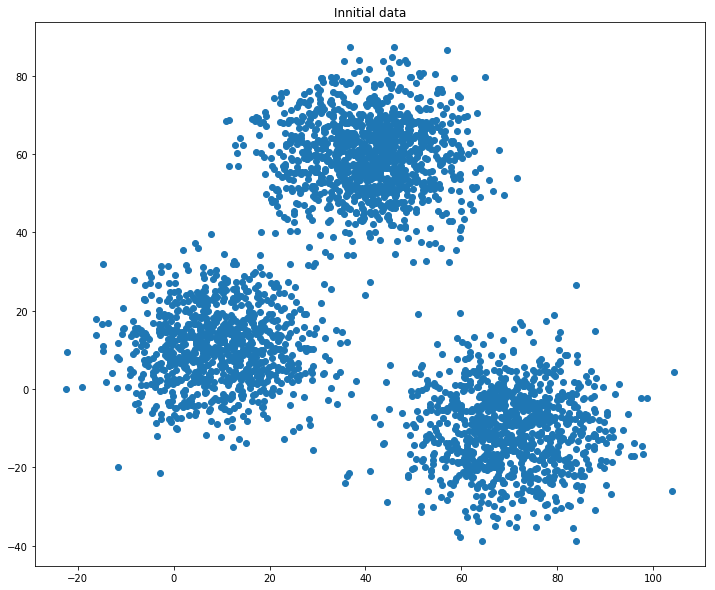

In [0]:
K_means.plot_cluster(df)

Call k_means_fit method to fit the data and find clusters

In [0]:
cluster, centroids = K_means.k_means_fit()

Number of clusters 2
Id of randomly selected data [ 860 1294]
Clusters mean for iteration 0
[[ 4.492934 16.61764 ]
 [38.16132  56.99729 ]]
-------------------------------
Clusters mean for iteration  1
[[32.86669447  0.28315615]
 [48.62923984 46.23767084]]
-------------------------------
Clusters mean for iteration  2
[[40.38372708 -0.35106546]
 [40.96441929 58.86629803]]
-------------------------------
Clusters mean for iteration  3
[[40.98395027 -0.44409339]
 [40.03102995 59.16264426]]
-------------------------------
Clusters mean for iteration  4
[[41.13099911 -0.57460442]
 [39.81099736 58.95988868]]
-------------------------------
Clusters mean for iteration  5
[[41.14551346 -0.59074409]
 [39.78979001 58.93434506]]
-------------------------------


Plot graph

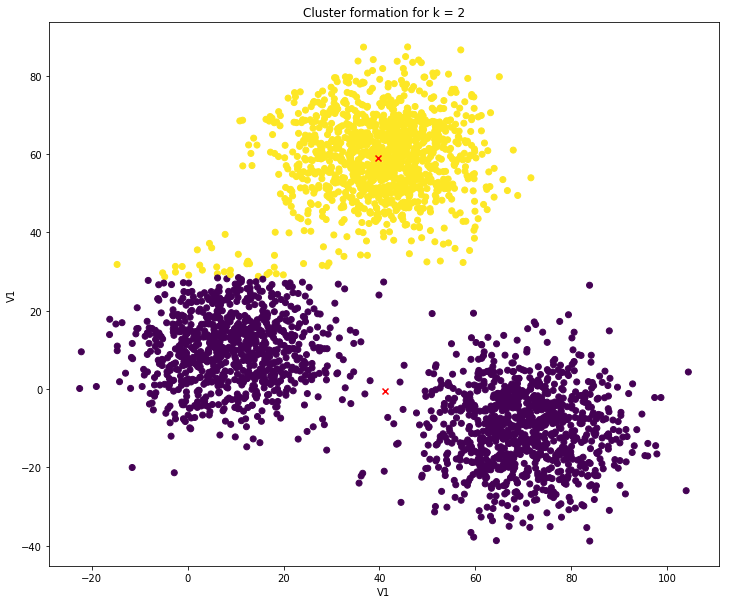

In [0]:
K_means.plot_cluster(df, cluster, centroids)